In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data = df[(df['ocean_proximity']== '<1H OCEAN') | (df['ocean_proximity']== 'INLAND')][['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

<Axes: xlabel='median_house_value', ylabel='Count'>

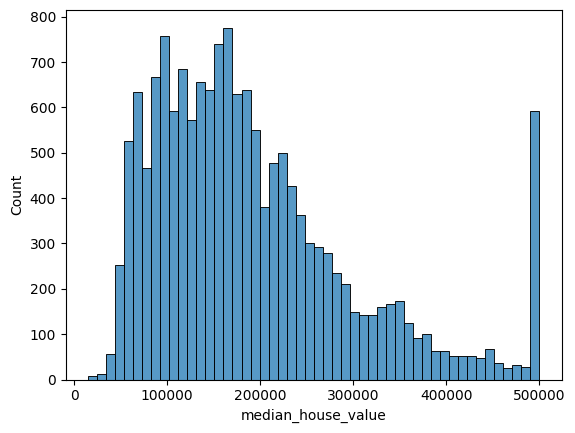

In [16]:
sns.histplot(data.median_house_value, bins=50)

In [8]:
# Question 1
data.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [11]:
# Question 2
data['population'].median()

np.float64(1195.0)

In [43]:
# Data Preparation
n = len(data)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = data.iloc[idx[n_train:]]
df_val = data.iloc[idx[n_train:n_train+n_val]]
df_test = data.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [45]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,37.02,-120.09,9.0,1608.0,297.0,1057.0,295.0,3.7143
1,33.84,-117.88,34.0,1410.0,214.0,837.0,240.0,6.1168
2,33.95,-118.21,32.0,1116.0,328.0,1265.0,302.0,2.2950
3,36.32,-119.32,29.0,2409.0,436.0,1142.0,440.0,3.6895
4,33.14,-117.11,10.0,3208.0,636.0,1395.0,582.0,3.4455
...,...,...,...,...,...,...,...,...
6269,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923
6270,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504
6271,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875
6272,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250
